## Project 2 - Classification Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data= pd.read_csv('weatherdata.csv')
data.shape

(3000, 24)

## Exploring Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
Date             3000 non-null object
Location         3000 non-null object
MinTemp          2994 non-null float64
MaxTemp          2999 non-null float64
Rainfall         2980 non-null float64
Evaporation      0 non-null float64
Sunshine         0 non-null float64
WindGustDir      2990 non-null object
WindGustSpeed    2990 non-null float64
WindDir9am       2486 non-null object
WindDir3pm       2961 non-null object
WindSpeed9am     2996 non-null float64
WindSpeed3pm     2993 non-null float64
Humidity9am      2996 non-null float64
Humidity3pm      2996 non-null float64
Pressure9am      3000 non-null float64
Pressure3pm      2996 non-null float64
Cloud9am         1272 non-null float64
Cloud3pm         1411 non-null float64
Temp9am          2996 non-null float64
Temp3pm          2996 non-null float64
RainToday        2980 non-null object
RISK_MM          3000 non-null float64
RainTomo

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,2994.000000,2999.000000,2980.000000,0.0,0.0,2990.000000,2996.000000,2993.000000,2996.000000,2996.000000,3000.000000,2996.000000,1272.000000,1411.000000,2996.000000,2996.000000,3000.000000
mean,9.549532,22.662221,1.932483,NaN,NaN,33.002676,8.238985,14.415302,74.017023,47.814085,1018.335833,1015.724332,6.389151,5.423813,14.383445,21.395360,1.920600
std,6.054214,7.793239,6.259577,NaN,NaN,13.348784,6.748694,7.179581,17.403415,19.824585,7.351716,7.101547,2.390706,2.825989,6.358004,7.521371,6.240495
min,-2.800000,6.800000,0.000000,NaN,NaN,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000,0.000000
25%,4.800000,15.900000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,61.000000,33.000000,1013.400000,1010.700000,5.000000,2.000000,9.300000,15.000000,0.000000
50%,9.100000,22.000000,0.000000,NaN,NaN,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,8.000000,7.000000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,0.400000,NaN,NaN,41.000000,11.000000,19.000000,88.000000,60.000000,1023.225000,1020.500000,8.000000,8.000000,19.325000,27.200000,0.400000
max,28.300000,44.800000,104.200000,NaN,NaN,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000,104.200000


In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
2995,6/10/2017,Albury,1.9,16.7,0.0,NaN,NaN,NW,13.0,NE,...,58.0,1034.4,1031.3,NaN,NaN,7.1,16.0,No,0.0,No
2996,6/11/2017,Albury,1.4,16.6,0.0,NaN,NaN,ENE,13.0,NE,...,60.0,1031.1,1026.5,1.0,NaN,6.6,16.3,No,0.2,No
2997,6/12/2017,Albury,1.9,15.1,0.2,NaN,NaN,W,17.0,SSE,...,70.0,1029.1,1026.4,8.0,NaN,5.1,14.8,No,0.2,No
2998,6/13/2017,Albury,3.3,15.9,0.2,NaN,NaN,SE,17.0,NaN,...,67.0,1031.3,1029.8,1.0,NaN,6.6,15.4,No,0.2,No
2999,6/14/2017,Albury,1.6,15.3,0.2,NaN,NaN,SE,17.0,NaN,...,69.0,1032.0,1029.0,NaN,NaN,5.6,15.0,No,0.0,No


In [7]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

## Checking for missing values and imputing

In [8]:
data.isnull().sum()

Date                0
Location            0
MinTemp             6
MaxTemp             1
Rainfall           20
Evaporation      3000
Sunshine         3000
WindGustDir        10
WindGustSpeed      10
WindDir9am        514
WindDir3pm         39
WindSpeed9am        4
WindSpeed3pm        7
Humidity9am         4
Humidity3pm         4
Pressure9am         0
Pressure3pm         4
Cloud9am         1728
Cloud3pm         1589
Temp9am             4
Temp3pm             4
RainToday          20
RISK_MM             0
RainTomorrow        0
dtype: int64

In [9]:
data.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis = 1, inplace = True) 

In [10]:
data["MinTemp"].fillna(data["MinTemp"].mean(), inplace = True)
data["MaxTemp"].fillna(data["MaxTemp"].mean(), inplace = True)
data["Rainfall"].fillna(data["Rainfall"].mean(), inplace = True)
data["WindGustSpeed"].fillna(data["WindGustSpeed"].mean(), inplace = True)
data["WindSpeed9am"].fillna(data["WindSpeed9am"].mean(), inplace = True)
data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].mean(), inplace = True)
data["Humidity9am"].fillna(data["Humidity9am"].mean(), inplace = True)
data["Humidity3pm"].fillna(data["Humidity3pm"].mean(), inplace = True)
data["Pressure3pm"].fillna(data["Pressure3pm"].mean(), inplace = True)
data["Temp9am"].fillna(data["Temp9am"].mean(), inplace = True)
data["Temp3pm"].fillna(data["Temp3pm"].mean(), inplace = True)
data["WindGustDir"].fillna("NW", inplace = True)
data["WindDir9am"].fillna("NWW", inplace = True)
data["WindDir3pm"].fillna("SE", inplace = True)
data["RainToday"].fillna("Yes", inplace = True)

In [11]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [12]:
data.shape

(3000, 20)

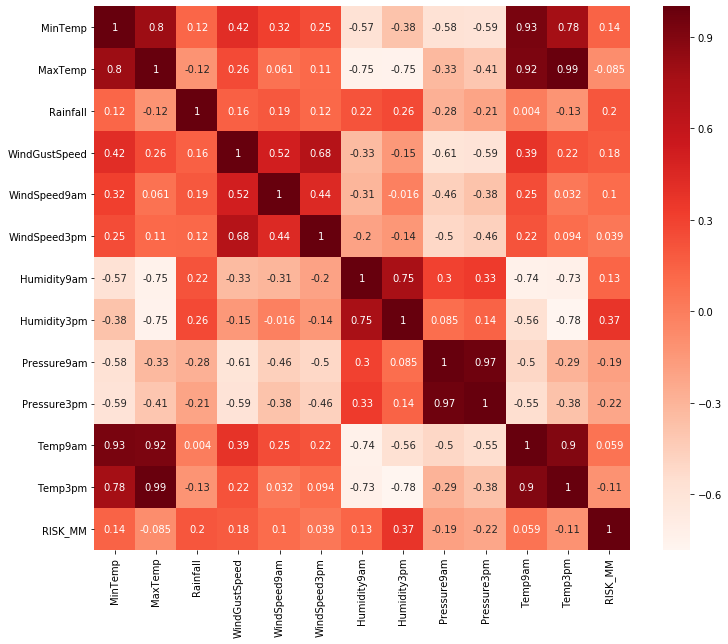

In [13]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["loc_encoded"]=le.fit_transform(data["Location"])
data["rain_encoded"]=le.fit_transform(data["RainToday"])
data["WindGust_encoded"]=le.fit_transform(data["WindGustDir"])
data["Dir9am_encoded"]=le.fit_transform(data["WindDir9am"])
data["Dir3pm_encoded"]=le.fit_transform(data["WindDir3pm"])
data["RainTom"]=le.fit_transform(data["RainTomorrow"])

In [15]:
data['loc_encoded'] = data['loc_encoded'].astype(float)
data['rain_encoded'] = data['rain_encoded'].astype(float)
data['WindGust_encoded'] = data['WindGust_encoded'].astype(float)
data['Dir9am_encoded'] = data['Dir9am_encoded'].astype(float)
data['Dir3pm_encoded'] = data['Dir3pm_encoded'].astype(float)

data.drop(['Date','Location','RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [16]:
X = data.drop('RainTom',axis=1).values
y = data.RainTom.values
X

array([[13.4, 22.9,  0.6, ..., 13. , 14. , 14. ],
       [ 7.4, 25.1,  0. , ..., 14. ,  6. , 15. ],
       [12.9, 25.7,  0. , ..., 15. , 14. , 15. ],
       ...,
       [ 1.9, 15.1,  0.2, ..., 13. , 11. , 13. ],
       [ 3.3, 15.9,  0.2, ...,  9. ,  8. ,  2. ],
       [ 1.6, 15.3,  0.2, ...,  9. ,  8. ,  9. ]])

In [17]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train_org

array([[ 6.1, 20.4,  0. , ...,  4. , 10. ,  5. ],
       [12.4, 29.4,  0. , ..., 10. , 11. ,  9. ],
       [11.2, 24.3,  0. , ..., 14. , 14. , 14. ],
       ...,
       [10.3, 16.7,  0.8, ..., 13. , 15. , 13. ],
       [13.6, 20.2,  0.2, ..., 13. ,  7. ,  7. ],
       [ 8.3, 13.6, 10.8, ...,  6. , 14. ,  7. ]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
X_test

array([[0.23794212, 0.32105263, 0.        , ..., 0.6       , 0.625     ,
        0.53333333],
       [0.40514469, 0.6       , 0.        , ..., 0.8       , 0.125     ,
        0.6       ],
       [0.23151125, 0.12894737, 0.        , ..., 0.2       , 0.1875    ,
        0.4       ],
       ...,
       [0.27009646, 0.33947368, 0.        , ..., 0.46666667, 0.5625    ,
        0.4       ],
       [0.62057878, 0.52894737, 0.00383877, ..., 0.73333333, 0.5       ,
        1.        ],
       [0.15434084, 0.10789474, 0.0134357 , ..., 0.8       , 1.        ,
        0.93333333]])

In [19]:
X_train_org.shape

(2400, 18)

In [20]:
X_test_org.shape

(600, 18)

In [21]:
y_train.shape

(2400,)

In [22]:
y_test.shape

(600,)

## Logistic Regression

In [23]:
log_clf = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(log_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [24]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 1.00


In [25]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l1.score(X_test, y_test))

0.97375
0.9716666666666667


In [26]:
log_clf = LogisticRegression(C=1)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.975  0.97   0.97   0.9725 0.9625 0.9575]
0.9679166666666669


In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.9251101321585904
[[478  16]
 [  1 105]]


### Logistic Regression Summary:

#### Train Score: 0.9738

#### Test Score: 0.9712

####  Cross - Validation Score: 1.0

#### Best Parameters: {'C': 1, 'penalty': 'l1'}

#### F1 Score: 0.9251

## KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

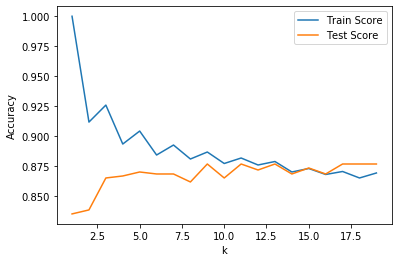

In [30]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score')
plt.plot(x_axis, test_score_array, label = 'Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8788
Test score: 0.8767


In [32]:
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20,25]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.86


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.3s finished


In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=13)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.86486486 0.87567568 0.86486486 0.92432432 0.83243243 0.87567568
 0.82162162 0.88108108 0.86956522 0.84782609 0.85326087 0.84782609
 0.88043478]
0.8645733526168308


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[470  68]
 [  9  53]]
0.5792349726775956


### KNN Classifier Summary:

#### Train Score: 0.8788

#### Test Score: 0.8767

#### Cross - Validation Score: 0.86

#### Best Parameters: {'n_neighbors': 5}

#### F1 Score: 0.5792

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,10):
    dtree_clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree_clf.fit(X_train, y_train)
    train= dtree_clf.score(X_train, y_train)
    test = dtree_clf.score(X_test, y_test)
    print("Accuracy on training set: {:.3f}".format(dtree_clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(dtree_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [36]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [37]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [38]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [39]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 1}
Best cross-validation score: 1.00


In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[479   0]
 [  0 121]]
1.0


### Decision Tree Summary:

#### Train Score: 1.0

#### Test Score: 1.0

#### Cross - Validation Score: 1.0

#### F1 Score: 1.0

#### Using Grid Search, we find max depth as 1 in decision tree model

## Linear SVC

In [41]:
from sklearn.model_selection import GridSearchCV
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)

In [42]:
from sklearn.model_selection import GridSearchCV
svc_linear_clf = SVC(kernel = 'linear', probability=True)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc_linear_clf,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 1.00


### Linear SVC Summary:

#### Best Parameter: {'C': 1}

#### Cross - Validation Score: 1.0

## Gaussian Naive Bayes

In [44]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [45]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
print(gnb_clf.score(X_train,y_train))
print(gnb_clf.score(X_test,y_test))

0.9555555555555556
0.956


### Gaussian Naive Bayes Summary:

#### Train Score: 0.9555

#### Test Score: 0.9560

## Soft Voting using Logistic Regression and Gaussian Naive Bayes

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [48]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('Gaussian',gnb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [49]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,gnb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9983333333333333
GaussianNB 0.9616666666666667
VotingClassifier 0.9766666666666667


## Hard Voting using KNN Classifier and Guassian Naive Bayes

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)


In [51]:
voting_clf = VotingClassifier(estimators=[('knn', knn),('Gaussian',gnb_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=20,
                                                   p=2, weights='uniform')),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [52]:

from sklearn.metrics import accuracy_score
for clf in (knn,gnb_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.88
GaussianNB 0.9616666666666667
VotingClassifier 0.8833333333333333


## Bagging using Decision Tree and Logistic Regression

### Using Decision Tree

In [53]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [54]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}

In [55]:
clf = GridSearchCV(BaggingClassifier(dtree_clf,
                                     n_estimators = 100, bootstrap=True,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                   

In [56]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.05}


In [57]:
y_pred = clf.predict(X_test)

In [58]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [59]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 1.00
Test score: 1.00


In [60]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

1.0


## NOTE - Since the dataset is biased towards one of the values in the target variable, we are getting train and test score as 1.0

### Using Logistic Regression

In [61]:
bag_log_clf = GridSearchCV(BaggingClassifier(log_clf,
                                     n_estimators = 100, max_features = 8,bootstrap=True, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                             

In [62]:
y_pred = bag_log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.965


In [63]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


## Pasting using KNN Classifier and Logistic Regression

### Using KNN Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

bag_clf = BaggingClassifier(knn,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=10, p=2,
                                                      weights='uniform'),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
bag_clf.score(X_train, y_train)

0.8645833333333334

In [67]:
bag_clf.score(X_test, y_test)

0.8633333333333333

### Using Logistic Regression

In [68]:
bag_log_clf = GridSearchCV(BaggingClassifier(log_clf,
                                     n_estimators = 100, max_features = 8,bootstrap= False, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                             

In [69]:
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


## AdaBoosting using Gaussian Naive Bayes and Decision Tree

### Using Gaussian Naive Bayes

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [72]:
param_grid = {
    'n_estimators'  : [100,200,300,400,500,600,700],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    
}

ada_clf = GridSearchCV(AdaBoostClassifier(gnb_clf, algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=GaussianNB(priors=None,
                                                                    var_smoothing=1e-09),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score: 1.00


In [74]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


### Using Decision Tree

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [77]:
dtree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [78]:
ada_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min

In [79]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 1.00


In [80]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


## Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [83]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [84]:

gbr_clf = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=6)
gbr_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [85]:
print("Best parameters: {}".format(gbr_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(gbr_clf.best_score_))

Best parameters: {'max_depth': 1}
Best cross-validation score: 1.00


In [86]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## PCA

In [87]:
from sklearn.decomposition import PCA

In [88]:
clients_pca = data

In [89]:
X = data.drop('RainTom',axis=1).values
y = data.RainTom.values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [91]:
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [92]:
X_train_reduced

array([[  0.90143554, -15.6397714 ,  -0.63617991, ...,   2.11815554,
         -2.69532932,   0.83821011],
       [ 29.88192796, -14.93498497,   1.93181549, ...,   0.12168779,
          0.98794517,   1.67515054],
       [ 23.56923609,  13.71927324,  -6.47210992, ...,   2.29345985,
          0.54381106,   3.48153422],
       ...,
       [  0.63248796,  43.28406232, -26.95210724, ...,   0.45919441,
         -8.08036993,  14.43015733],
       [-14.7753155 ,  -6.75539425,   5.8883346 , ...,  -7.05000866,
         -3.78604756,   4.58396042],
       [-26.04209123,  22.42733083,  -1.90381509, ...,   1.98254136,
         -7.33864579,   0.45908263]])

In [93]:
pca.n_components_

9

In [94]:
pca.explained_variance_

array([761.88683732, 276.4410161 ,  95.39765166,  71.24519544,
        46.3301771 ,  33.3017575 ,  27.97316474,  25.63935231,
        22.01260524])

In [95]:
pca.explained_variance_ratio_

array([0.53939893, 0.19571409, 0.06753941, 0.05044001, 0.03280073,
       0.0235769 , 0.01980438, 0.01815209, 0.01558443])

In [96]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)

## KNN Classification (After applying PCA)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

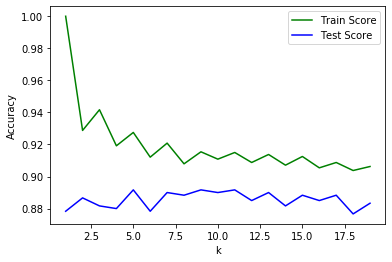

In [98]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [99]:
knn = KNeighborsClassifier(8)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

0.9079166666666667
0.8883333333333333


In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=8)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.90333333 0.90666667 0.9        0.88666667 0.90333333 0.9
 0.88333333 0.89      ]
0.8966666666666667


In [101]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(2)
knn.fit(X_train_pca, y_train)
ypred = knn.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[468  57]
 [ 11  64]]
0.6530612244897959


### KNN Classification Summary (After PCA) :

#### Train Score: 0.9079

#### Test Score: 0.8883

#### Mean Cross - Validation Score: 0.8967

#### Best Parameters: {'n_neighbors': 10}

#### F1 Score: 0.6531

### KNN Classification Summary (Before PCA) :

#### Train Score: 0.8758

#### Test Score: 0.8747

#### Mean Cross - Validation Score: 0.8516

#### Best Parameters: {'n_neighbors': 25}

#### F1 Score: 0.5503

## Logistic Regression (After applying PCA)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

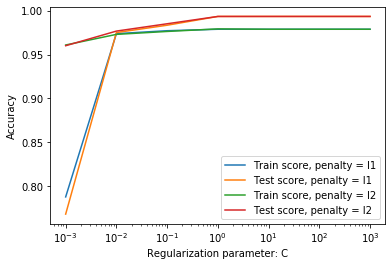

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [105]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [106]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.98


In [107]:
log_l2 = LogisticRegression(penalty = 'l2', C = 100)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train_reduced, y_train)
print(log_l2.score(X_train_reduced, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l2.score(X_test_reduced, y_test))

0.97875
0.9933333333333333


In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
kfold = KFold(n_splits=2)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.97416667 0.97833333]
0.9762500000000001


In [109]:
from sklearn.metrics import f1_score
log_l2 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l2.fit(X_train_reduced, y_train)
ypred = log_l2.predict(X_test_reduced)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.9356223175965664
[[476  12]
 [  3 109]]


### Logistic Regression Summary (After PCA) :

#### Train Score: 0.9788

#### Test Score: 0.9933

#### Mean Cross - Validation Score: 0.9763

#### Best Parameters: {'C': 1, 'penalty': 'l1'}

#### F1 Score: 0.9356

### Logistic Regression Summary (Before PCA) :

#### Train Score: 0.9682

#### Test Score: 0.9733

#### Mean Cross - Validation Score: 0.9651

#### Best Parameters: {'C': 1, 'penaty': 'l1'}

#### F1 Score: 0.9312

## Decision Tree (After applying PCA)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [111]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [112]:
dtree_clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid, cv=6, return_train_score=True)
dtree_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [113]:
print("Best parameters: {}".format(dtree_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_clf.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.88


In [114]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.798


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7925 0.77   0.8325 0.7825 0.7725 0.7825]
1.0


In [116]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_reduced, y_train)
ypred = dtree.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[479 121]
 [  0   0]]
0.0


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### Decision Tree Summary (After PCA) :

#### Train Score: 0.7930

#### Test Score: 0.7980

#### Mean Cross - Validation Score: 1.0

#### F1 Score: 0.0

### Decision Tree Summary (Before PCA) :

#### Train Score: 1.0

#### Test Score: 1.0

#### Mean Cross - Validation Score: 1.0

#### F1 Score: 1.0

## Kernelized Support Vector Machine - rbf (After applying PCA)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
scaler = MinMaxScaler()
scaler.fit(X_train_reduced)
X_train_reduced = scaler.transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)

In [118]:
X_train_reduced.shape, y_train.shape

((2400, 9), (2400,))

In [119]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train_reduced, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_reduced, y_train))
        test.append(svc.score(X_test_reduced, y_test))
        index.append((C,gamma))

In [120]:
print(train)
print(test)
print(index)

[0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7975, 0.8941666666666667, 0.9183333333333333, 0.7933333333333333, 0.7933333333333333, 0.7983333333333333, 0.8958333333333334, 0.9408333333333333, 0.9616666666666667, 0.9920833333333333, 0.7983333333333333, 0.8958333333333334, 0.9420833333333334, 0.9683333333333334, 0.99125, 1.0, 0.8966666666666666, 0.9420833333333334, 0.9704166666666667, 0.985, 1.0, 1.0]
[0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.7983333333333333, 0.8016666666666666, 0.8883333333333333, 0.9016666666666666, 0.7983333333333333,

In [121]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [122]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.97


In [123]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 0.001,gamma = 0.001)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_reduced, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.7925 0.77   0.8125 0.8    0.8025 0.7825]
0.7933333333333333


In [124]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 0.001 , gamma = 0.001)
svc.fit(X_train_reduced, y_train)
ypred = svc.predict(X_test_reduced)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[479 121]
 [  0   0]]
0.0


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### Kernelized Support Vector Machine - rbf Summary (After PCA) :

#### Train Score: 0.8958

#### Test Score: 0.8017

#### Mean Cross - Validation Score: 0.7933

#### Best Parameters: {'C': 100, 'gamma': 1}

#### F1 Score: 0.0

### Kernelized Support Vector Machine - rbf Summary (Before PCA) :

#### Train Score: 0.9151

#### Test Score: 0.9064

#### Mean Cross - Validation Score: 0.9168

#### Best Parameters: {'C': 10, 'gamma': 0.01}

#### F1 Score: 0.8362

## The PCA helps in getting better results for KNN Classification and Logistic Regression but not for Decision Tree and Kernelized Support Vector Machine - rbf 

## Deep Learning - Neural Network

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#split data set into train and test
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [126]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org.astype(float))
X_test = scaler.transform(X_test_org.astype(float))

In [127]:
X_train.shape

(2250, 18)

In [128]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(100)

In [129]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 18, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
2250/2250 [==============================] - 1s 249us/sample - loss: 0.7546 - acc: 0.3400
Epoch 2/20
2250/2250 [==============================] - 0s 14us/sample - loss: 0.6567 - acc: 0.7391
Epoch 3/20
2250/2250 [==============================] - 0s 12us/sample - loss: 0.6095 - acc: 0.7933
Epoch 4/20
2250/2250 [==============================] - 0s 12us/sample - loss: 0.5717 - acc: 0.7947
Epoch 5/20
2250/2250 [==============================] - 0s 13us/sample - loss: 0.5391 - acc: 0.7947
Epoch 6/20
2250/2250 [==============================] - 0s 12us/sample - loss: 0.5175 - acc: 0.7947
Epoch 7/20
2250/2250 [==============================] - 0s 12us/sample - loss: 0.5020 - acc: 0.7947
Epoch 8/20
2250/2250 [==============================] - 0s 11us/sample - loss: 0.4877 -

In [130]:
# step 4: model evaluation

model1.evaluate(X_train, y_train)

2250/2250 [==============================] - 0s 46us/sample - loss: 0.3728 - acc: 0.8471


[0.37277135128445094, 0.8471111]

In [131]:
model1.evaluate(X_test, y_test)

750/750 [==============================] - 0s 17us/sample - loss: 0.3668 - acc: 0.8467


[0.3667881643772125, 0.8466667]

In [132]:
y_pred = model1.predict(X_train)

In [133]:
from sklearn.metrics import precision_score
y_train_pred = np.where(y_pred >= 0.5, 1, 0)
precision_score(y_train, y_train_pred)

0.8352272727272727